# Model Training

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [2]:
SEED = 2024

## Load Data

In [3]:
data = pd.read_csv('data/ALL_DATA.csv')
data.head()

,landmark_0,landmark_1,landmark_2,landmark_3,landmark_4,landmark_5,landmark_6,landmark_7,landmark_8,landmark_9,...,landmark_33,landmark_34,landmark_35,landmark_36,landmark_37,landmark_38,landmark_39,landmark_40,landmark_41,class
0,0.257211,0.744543,0.339968,0.727104,0.412922,0.627686,0.430567,0.515687,0.429557,0.432274,...,0.557774,0.202958,0.487308,0.206469,0.471129,0.214699,0.552157,0.219286,0.558994,A
1,0.728281,0.759081,0.651978,0.733231,0.597377,0.654941,0.577211,0.569443,0.575342,0.500667,...,0.592039,0.765293,0.558770,0.747134,0.504385,0.739077,0.560152,0.745142,0.584256,A
2,0.239983,0.720653,0.327146,0.702203,0.406762,0.595091,0.427949,0.473646,0.424589,0.384379,...,0.524031,0.180131,0.454967,0.185324,0.425563,0.194856,0.514893,0.198210,0.528913,A
3,0.765670,0.719709,0.681658,0.696189,0.619881,0.611631,0.596331,0.517771,0.590325,0.442671,...,0.535039,0.801037,0.503700,0.785114,0.447262,0.780163,0.506798,0.784924,0.530553,A
4,0.235272,0.711383,0.322961,0.692866,0.402829,0.583089,0.424225,0.457621,0.422013,0.365959,...,0.507626,0.171638,0.440190,0.177146,0.411698,0.187595,0.501418,0.190326,0.514040,A


In [4]:
label_encoder = LabelEncoder()
data['class'] = label_encoder.fit_transform(data['class'])

class_names = label_encoder.classes_

In [5]:
data.shape

(5497, 43)

In [6]:
target = data['class']
data = data.drop('class', axis=1)

## Train Test Split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    data, 
    target, 
    test_size=0.3, 
    random_state=SEED
)

In [8]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

In [9]:
X_train.shape, X_test.shape

((3847, 42), (1650, 42))

In [10]:
y_train.shape, y_test.shape

((3847,), (1650,))

## Model

In [11]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(28, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         5,504 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 28)             │           924 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,660 (68.98 KB)

 Trainable params: 17,212 (67.23 KB)

 Non-trainable params: 448 (1.75 KB)

In [31]:
#Convertir los datos a matrices de NumPy si son DataFrames
X = X_train.values if isinstance(X_train, pd.DataFrame) else X_train
y = y_train_encoded.values if isinstance(y_train_encoded, pd.DataFrame) else y_train_encoded

In [32]:
#Definir el número de folds para cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

#Lista para almacenar la precisión de cada fold
fold_accuracies = []

In [33]:
for fold, (train_index, val_index) in enumerate(kf.split(X)):
    print(f"Training fold {fold+1}/{n_folds}...")
    
    #División de los datos en el fold actual
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]
    
    #Entrenar el modelo en el fold actual
    history = model.fit(
        X_train_fold,
        y_train_fold,
        epochs=50,
        batch_size=32,
        validation_data=(X_val_fold, y_val_fold),
        verbose=1
    )
    
    #Evaluar el modelo en el fold actual
    y_val_pred = np.argmax(model.predict(X_val_fold), axis=1)
    y_val_true = np.argmax(y_val_fold, axis=1)
    accuracy = accuracy_score(y_val_true, y_val_pred)
    fold_accuracies.append(accuracy)
    print(f"Accuracy for fold {fold+1}: {accuracy:.4f}")

Training fold 1/5...
Epoch 1/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9308 - loss: 0.2058 - val_accuracy: 0.9182 - val_loss: 0.2095
Epoch 2/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9495 - loss: 0.1391 - val_accuracy: 0.9481 - val_loss: 0.1415
Epoch 3/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9400 - loss: 0.1878 - val_accuracy: 0.9494 - val_loss: 0.1526
Epoch 4/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9289 - loss: 0.2335 - val_accuracy: 0.9299 - val_loss: 0.2090
Epoch 5/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9327 - loss: 0.2093 - val_accuracy: 0.9909 - val_loss: 0.0295
Epoch 6/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9592 - loss: 0.1280 - val_accuracy: 0.9805 - val_loss: 0.0684
Epoch 7/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9543 - loss: 0.1571 - val_accuracy: 0.9805 - val_loss: 0.0497
Epoch 8/50
97/97 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9341 - loss: 0.1867 - val_accurac

In [34]:
#Calcular y mostrar la precisión promedio de todas las folds
mean_accuracy = np.mean(fold_accuracies)
print(f"\nMean accuracy across all folds: {mean_accuracy:.4f}")


Mean accuracy across all folds: 0.9673


In [35]:
model.save('asl_classifier_model.keras')

## Model Evaluation

In [36]:
from sklearn.metrics import classification_report

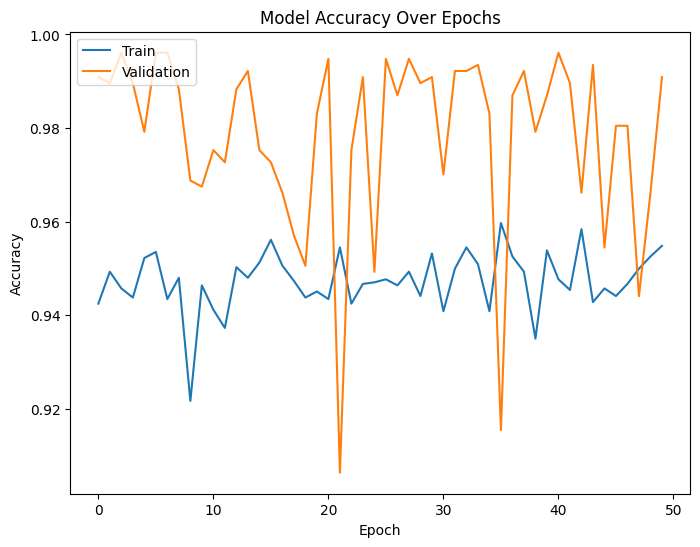

In [37]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy Over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

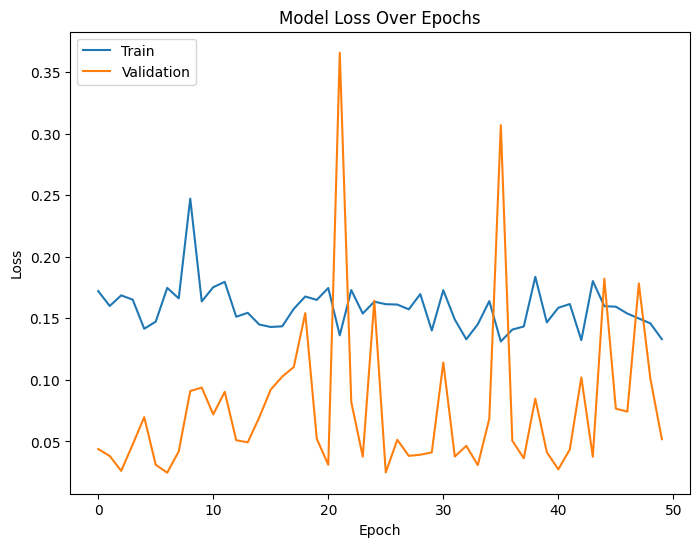

In [38]:
# Plot training & validation loss values
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss Over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [39]:
test_loss, test_accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9933 - loss: 0.0216
Test loss: 0.018922612071037292
Test accuracy: 0.9957575798034668


In [40]:
# Get predicted probabilities 
y_pred_prob = model.predict(X_test)

# Convert probabilities to class labels
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_encoded, axis=1)

52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [41]:
print(classification_report(y_true, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           A       0.98      1.00      0.99        52
           B       1.00      1.00      1.00        56
           C       1.00      0.98      0.99        55
           D       1.00      1.00      1.00        68
           E       1.00      1.00      1.00        58
           F       1.00      1.00      1.00        56
           G       1.00      0.95      0.98        63
           H       1.00      1.00      1.00        64
           I       1.00      1.00      1.00        56
           J       0.94      1.00      0.97        67
           K       1.00      1.00      1.00        58
           L       1.00      1.00      1.00        49
           M       1.00      1.00      1.00        59
           N       1.00      1.00      1.00        63
           O       1.00      1.00      1.00        69
           P       1.00      1.00      1.00        62
           Q       1.00      1.00      1.00        50
           R       1.00    

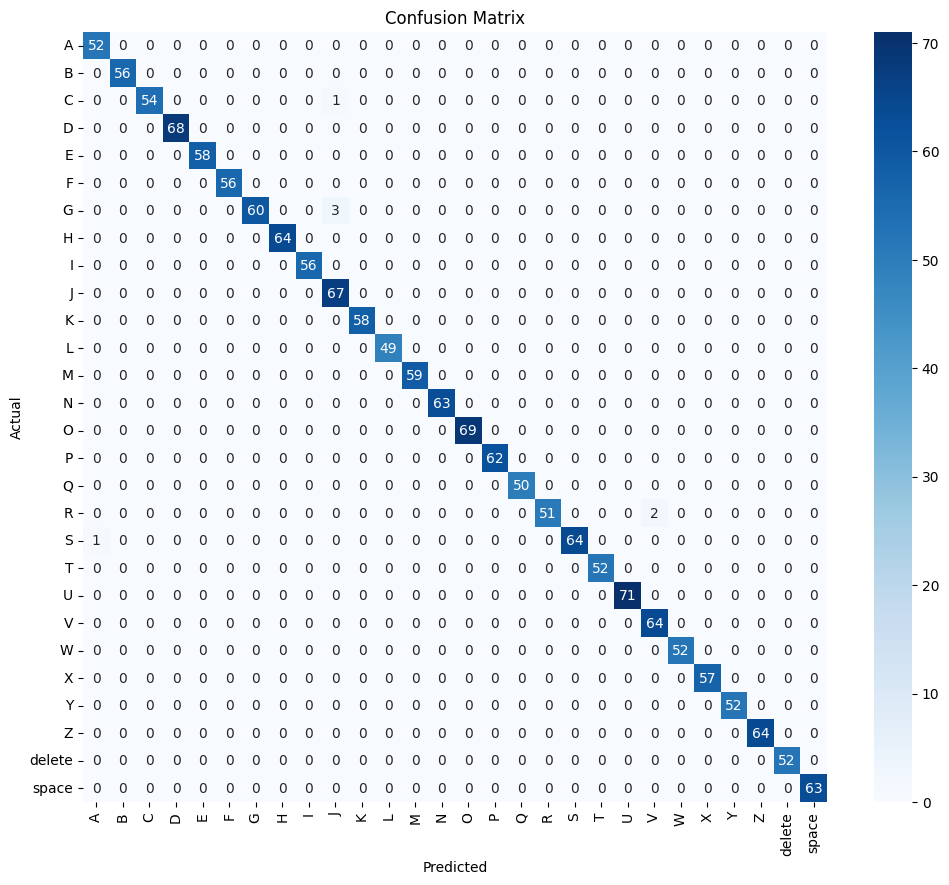

In [42]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()